In [ ]:
# Instalación de las bibliotecas necesarias
!pip install ultralytics easyocr opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [ ]:
import torch
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Cargar el modelo YOLOv5 preentrenado
model = YOLO('yolov5s.pt')
#model = yolov5.load('yolov5s.pt')

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 244MB/s]


Saving 7.png to 7.png

0: 320x640 2 persons, 5 cars, 391.2ms
Speed: 15.8ms preprocess, 391.2ms inference, 29.7ms postprocess per image at shape (1, 3, 320, 640)


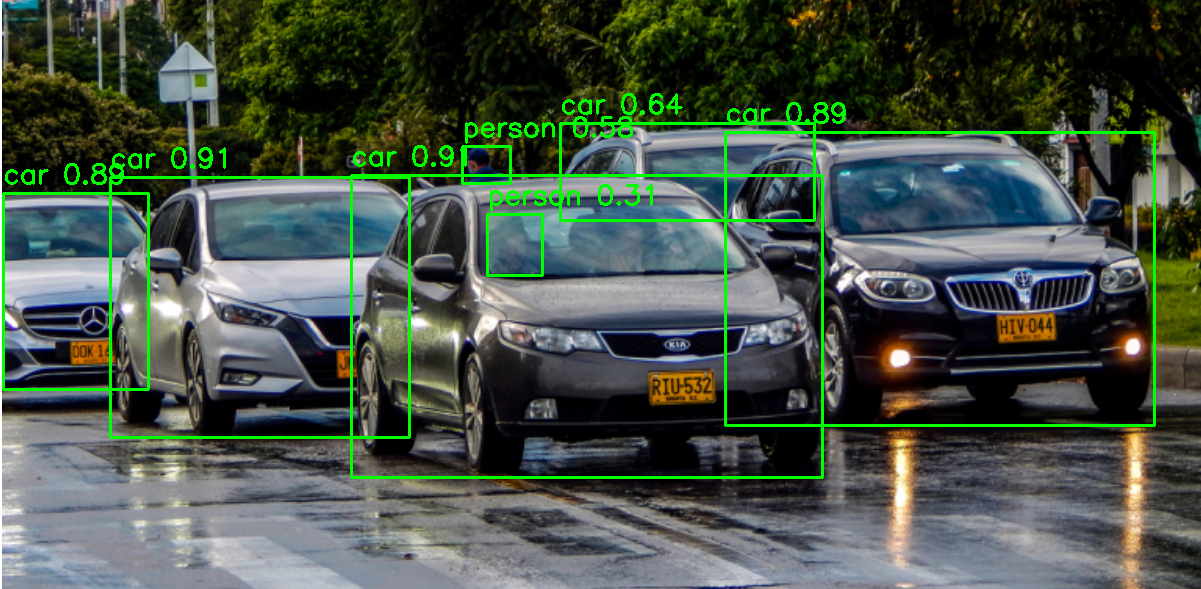

Detecciones en 7.png:

0: 320x640 5 cars, 426.5ms
Speed: 3.8ms preprocess, 426.5ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)
- car: 0.87
- car: 0.86
- car: 0.86
- car: 0.86
- car: 0.28


In [ ]:
# Función para procesar la imagen
def process_image(image):
    # Realizar la detección
    results = model(image)

    # Procesar los resultados
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Obtener coordenadas del cuadro delimitador
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Dibujar el cuadro delimitador
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Añadir etiqueta
            label = f"{model.names[int(box.cls)]} {box.conf.item():.2f}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return image

# Subir y procesar imagen
uploaded = files.upload()

for filename in uploaded.keys():
    # Leer la imagen
    image = cv2.imread(filename)

    # Procesar la imagen
    processed_image = process_image(image)

    # Mostrar la imagen procesada
    cv2_imshow(processed_image)

    # Imprimir información sobre las detecciones
    print(f"Detecciones en {filename}:")
    for r in model(image):
        for box in r.boxes:
            print(f"- {model.names[int(box.cls)]}: {box.conf.item():.2f}")